In [331]:
#import dependencies
import os
import pandas as pd
import glob
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

In [332]:
# #I want to display the data to better understand what I am working with
# #path = 'low_freq/house_1/'
# #forward slash to access path and a one more slash to access the folder of the file
# #houses 4 and 6 have air conditionong system
# path = 'E:/Document/Master/Dataset/Energy_disaggregation/REDD_dataset/low_freq/house_1/' 
# file = path + 'channel_1.dat'
# df = pd.read_table(file, sep= ' ')

In [333]:
def read_label():
    label = {}
    for i in range(1, 7):
        hi = 'E:/Document/Master/Dataset/Energy_disaggregation/REDD_dataset/low_freq/house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(hi) as f:
            for line in f:
                splitted_line = line.split(' ')
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label
labels = read_label()
for i in range(4,7,2): # the third variable is to step
    print('House {}: '.format(i), labels[i], '\n')
   

        

House 4:  {1: 'mains_1', 2: 'mains_2', 3: 'lighting_3', 4: 'furance_4', 5: 'kitchen_outlets_5', 6: 'outlets_unknown_6', 7: 'washer_dryer_7', 8: 'stove_8', 9: 'air_conditioning_9', 10: 'air_conditioning_10', 11: 'miscellaeneous_11', 12: 'smoke_alarms_12', 13: 'lighting_13', 14: 'kitchen_outlets_14', 15: 'dishwaser_15', 16: 'bathroom_gfi_16', 17: 'bathroom_gfi_17', 18: 'lighting_18', 19: 'lighting_19', 20: 'air_conditioning_20'} 

House 6:  {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'washer_dryer_4', 5: 'stove_5', 6: 'electronics_6', 7: 'bathroom_gfi_7', 8: 'refrigerator_8', 9: 'dishwaser_9', 10: 'outlets_unknown_10', 11: 'outlets_unknown_11', 12: 'electric_heat_12', 13: 'kitchen_outlets_13', 14: 'lighting_14', 15: 'air_conditioning_15', 16: 'air_conditioning_16', 17: 'air_conditioning_17'} 



In [334]:
 def read_merge_data(house):
    path = 'E:/Document/Master/Dataset/Energy_disaggregation/REDD_dataset/low_freq/house_{}/'.format(house)
    file = path + 'channel_1.dat'  
    # the 'names' option is called to label the colums, unix_time for the first axis and the appliance label for the second axis
    # dtype indicates that the first column is int64 (integer) and second column is float64 (float)
    # It is a good practice to specify the data type when reading the dataframe (could be strings,integer etc.)
    df = pd.read_table(file, sep = ' ', names=['unix_time', labels[house][1]],dtype={'unix_time':'int64', labels[house][1]: 'float64' })
    num_app = len(glob.glob(path + 'channel*'))# glob returns an empty list of the searched path
    for i in range (2, num_app + 1): # the counting starts from 2 bcus we already read channel 1 in the begining
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep= ' ', names= ['unix_time', labels[house][i]],
                                            dtype={'unix_time':'int64', labels[house][i]:'float64'})
        df = pd.merge(df, data, how='inner', on = 'unix_time')
    #Convert unix_time axis to datetime and make a column out of it (appended to the last column)  
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    # Set the datetime column as the index(row) for the dataframe 
    df = df.set_index(df['timestamp'].values)
    #drop unix_time and timestamp colums, from axix 1(column bcus default = 0 which is rows)
    df.drop(['unix_time','timestamp'], axis=1, inplace=True)
    return df
df = {}
for i in range (4,7,2):
    df[i] = read_merge_data(i)
    


In [335]:
for i in range (4,7,2):
    print ('House {} data has shape:'.format(i), df[i].shape)
    display(df[i].head(3))

House 4 data has shape: (428076, 20)


,mains_1,mains_2,lighting_3,furance_4,kitchen_outlets_5,outlets_unknown_6,washer_dryer_7,stove_8,air_conditioning_9,air_conditioning_10,miscellaeneous_11,smoke_alarms_12,lighting_13,kitchen_outlets_14,dishwaser_15,bathroom_gfi_16,bathroom_gfi_17,lighting_18,lighting_19,air_conditioning_20
2011-04-17 01:16:32,462.31,86.58,243.0,4.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,51.0,139.0,0.0,0.0,0.0,15.0,0.0,0.0
2011-04-17 01:16:35,462.41,86.56,244.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,51.0,138.0,0.0,0.0,0.0,15.0,0.0,0.0
2011-04-17 01:16:38,462.89,86.62,243.0,5.0,1.0,0.0,1.0,5.0,0.0,0.0,2.0,0.0,51.0,140.0,0.0,0.0,0.0,15.0,0.0,0.0


House 6 data has shape: (192192, 17)


,mains_1,mains_2,kitchen_outlets_3,washer_dryer_4,stove_5,electronics_6,bathroom_gfi_7,refrigerator_8,dishwaser_9,outlets_unknown_10,outlets_unknown_11,electric_heat_12,kitchen_outlets_13,lighting_14,air_conditioning_15,air_conditioning_16,air_conditioning_17
2011-05-21 19:39:51,46.78,255.62,5.0,2.0,3.0,0.0,3.0,1.0,0.0,0.0,26.0,88.0,0.0,124.0,4.0,0.0,0.0
2011-05-21 19:39:57,46.92,257.48,5.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,27.0,94.0,1.0,116.0,4.0,0.0,0.0
2011-05-21 19:40:00,46.82,255.07,5.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,27.0,95.0,0.0,116.0,4.0,0.0,0.0


In [336]:
#Get the date the data were collected.
dates = {}
for i in range (4,7,2):
    dates[i] = [str(time)[:10] for time in df[i].index.values]# returns the series of the index
    dates[i] = sorted(list(set(date[i])))
    print ('House {0} data contains {1} days from {2} to {3}'.format(i,len(date[i]),date[i][0],date[i][-1]))
    #print(date[i],'\n')
    


House 4 data contains 26 days from 2011-04-17 to 2011-06-04
House 6 data contains 17 days from 2011-05-21 to 2011-06-14


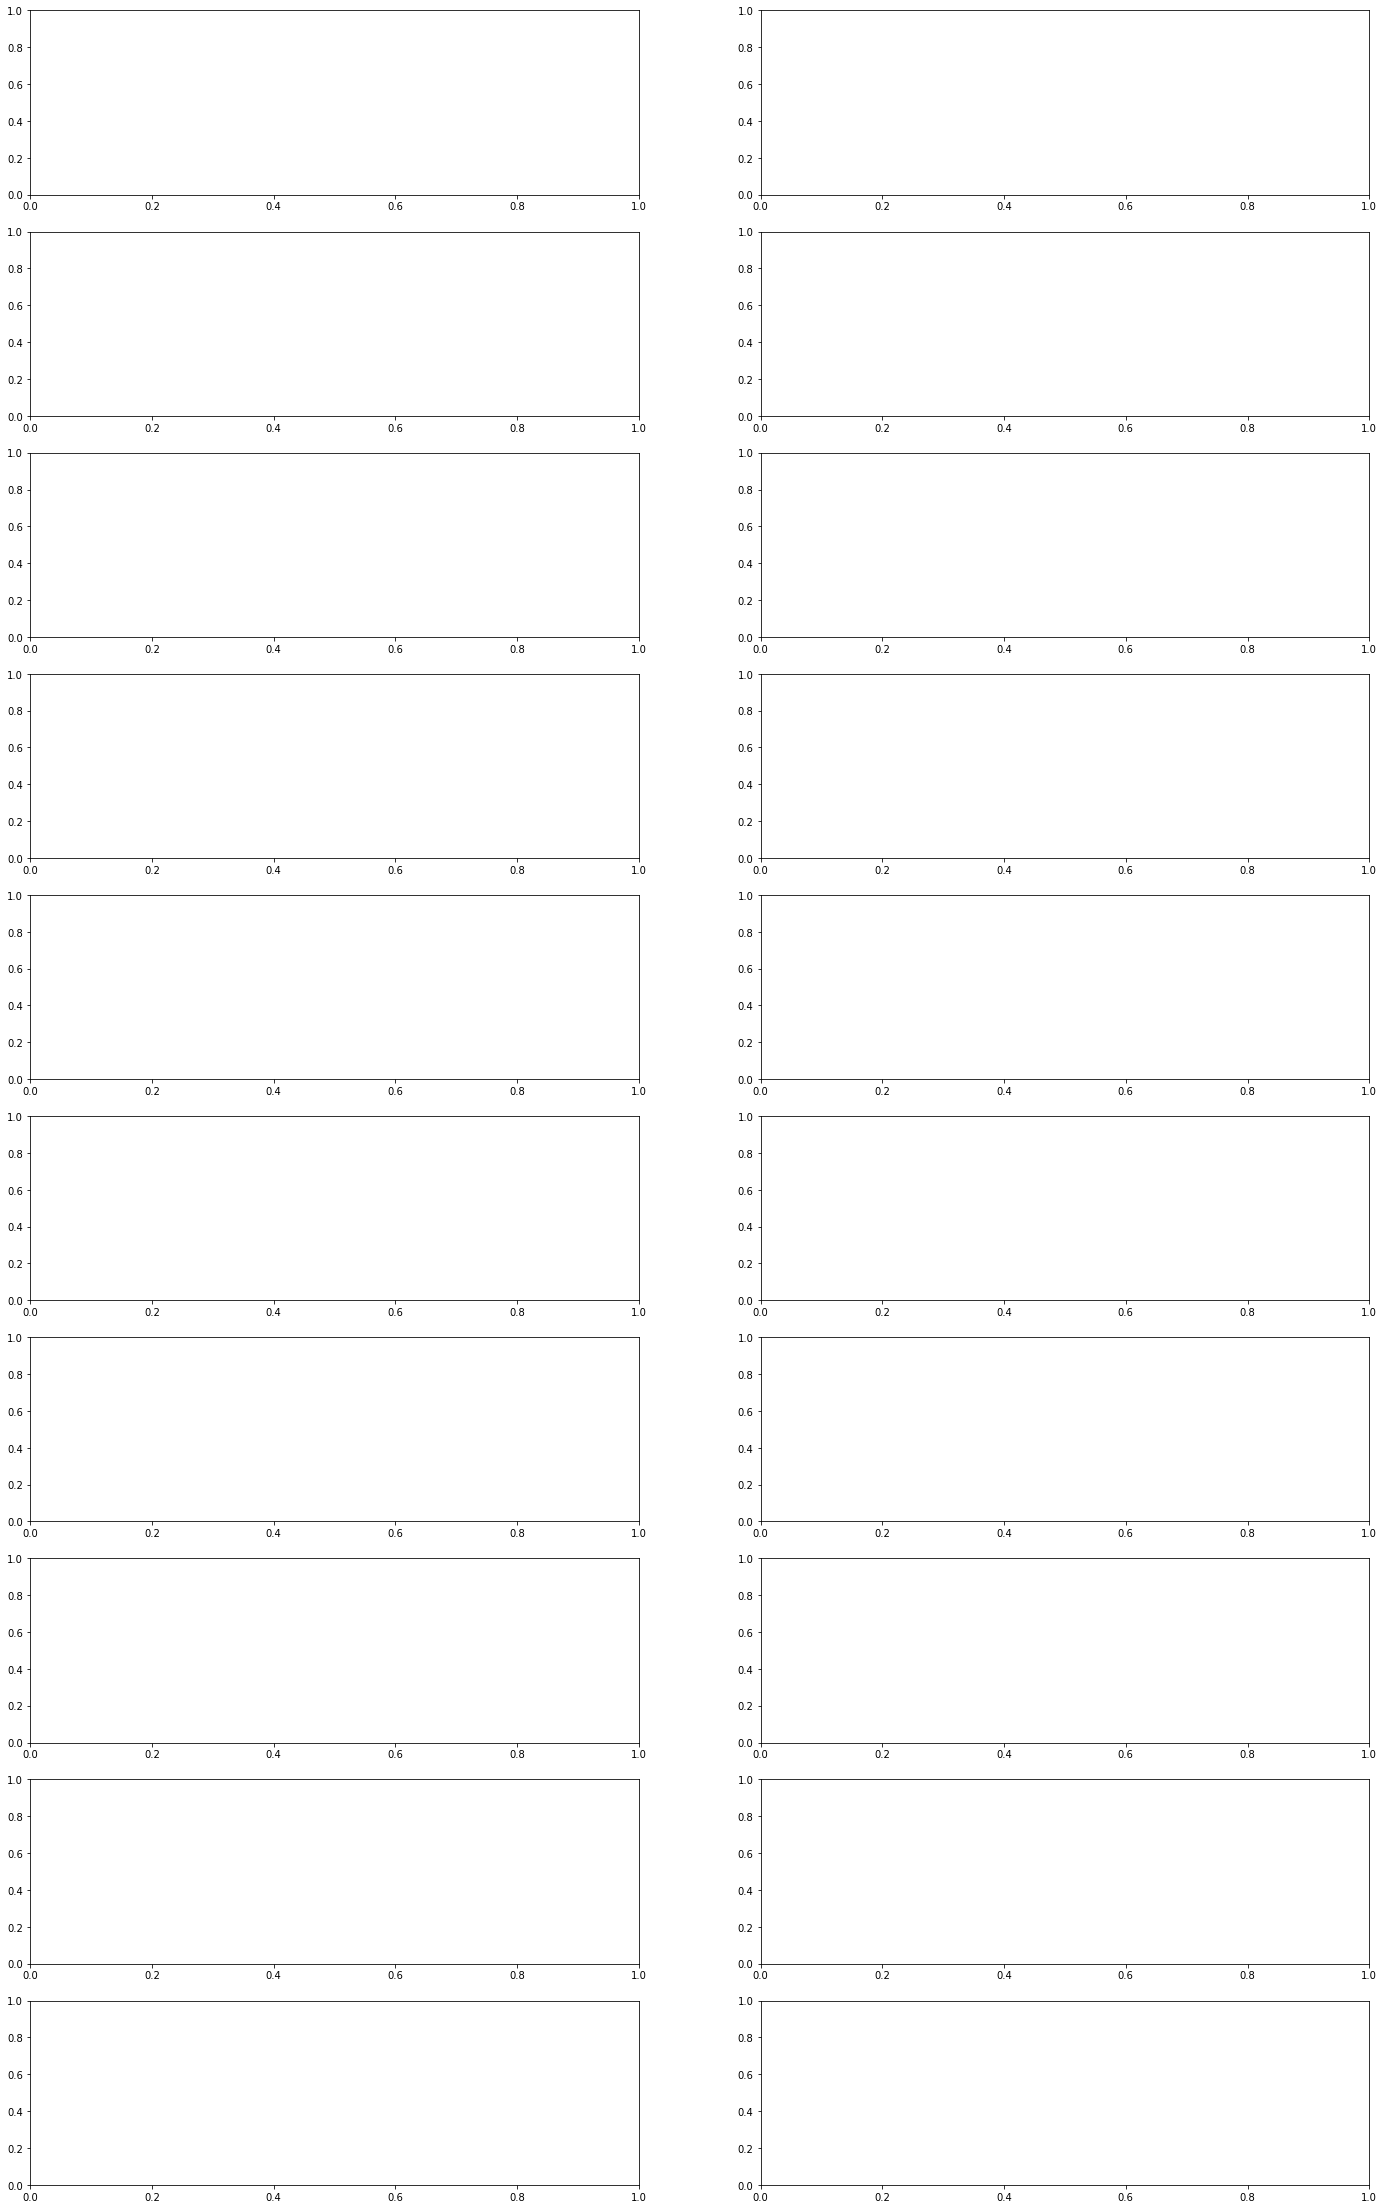

In [337]:
# Plot 2 first day data of house 1 and 2
df = df[4].loc[:dates[4][1]] #.loc slices the row from 0 till date 1(representing 2 days)
apps = df.columns.values# returns an array of the columns
num_apps = len(apps)
fig, axes = plt.subplots((num_app + 1)//2,2, figsize=(24, num_app*2)) # .subplot(nrow(10),ncol(2),plot_number(max= nrow*ncol)) // floor division 9//2 = 4
